Imports

In [1]:
#------------------ General Purpose Imports ---------------------#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
import pickle

#------------------ Machine Learning Imports ---------------------#
import torch
import scipy
import torch.utils.data
from sklearn.model_selection import train_test_split

#------------------ Dataset imports ---------------------#
import dysts
from dysts import flows


In [2]:
#------------------ system imports ---------------------#
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../..')))

#------------------ reservoirgrid imports ---------------------#
from reservoirgrid.models import Reservoir
from reservoirgrid.helpers import utils
from reservoirgrid.helpers import viz
from reservoirgrid.helpers import chaos_utils
from reservoirgrid.helpers import reservoir_tests
#--------------------------------------------------------------#

device setting

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Loading Datasets

In [ ]:
system_name = "Lorenz"
path = "../../reservoirgrid/datasets/Chaotic/" + system_name + ".npy"

if not os.path.exists(path):
    print("System does not exist, Generate First")
else:
    print("System exist, loading from datasets")
    system = np.load(path, allow_pickle=True)
    print("System loaded")

System exist, loading from datasets
System loaded


## Data processing

In [17]:
T_system = utils.truncate(system) #truncated system to have same periods
pp_select = 2

input = T_system[pp_select][1] # selecting the sample 
input = utils.normalize_data(input)

Vizulizing Datasets

(None, None)

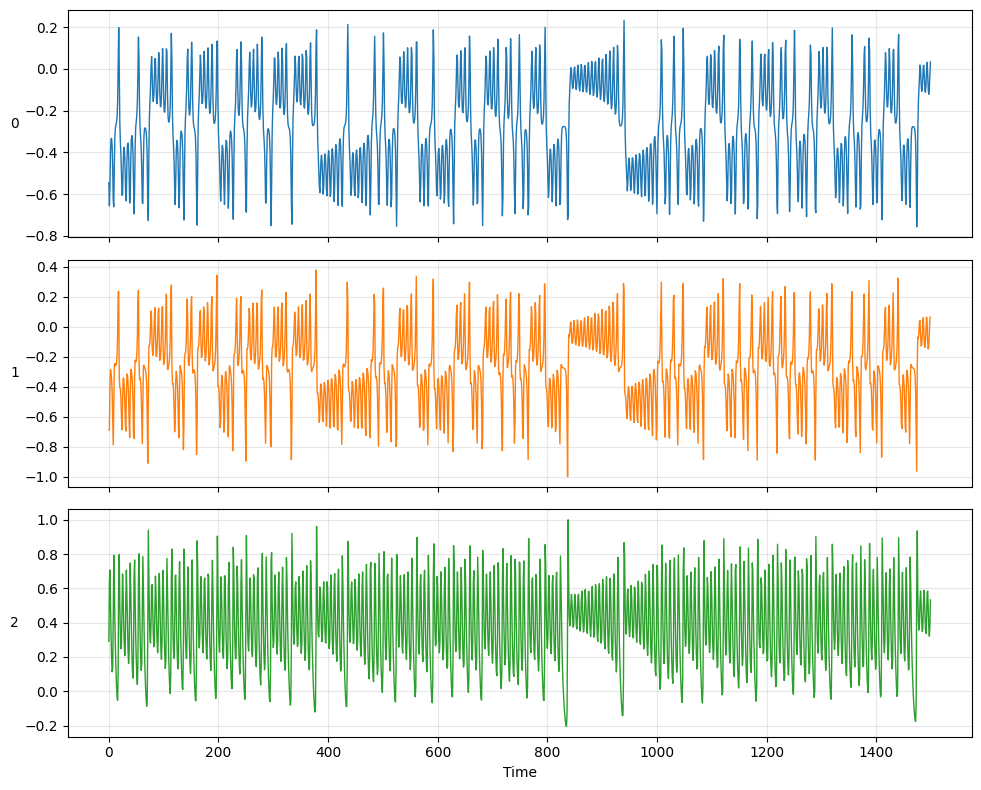

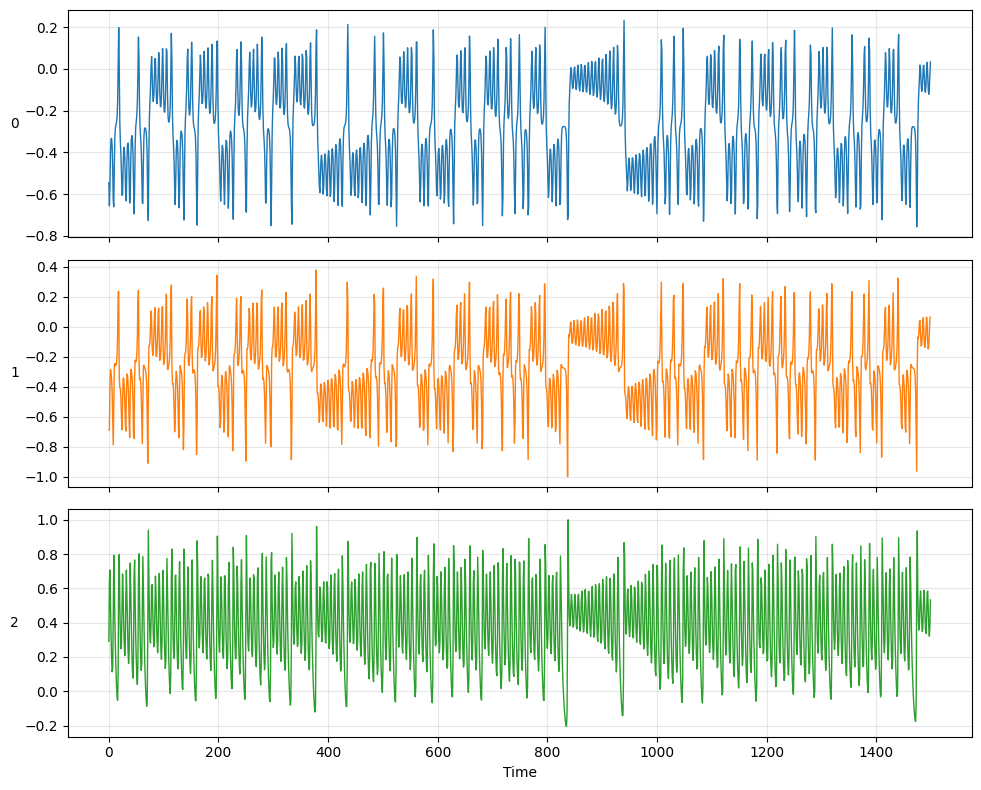

In [6]:
viz.plot_components(input), viz.plot_components(input)

## Trainig and predictions

In [15]:
parameter_dict = {
    "SpectralRadius": [0.7, 0.8, 0.9, 1.0, 1.1, 1.2],
    "LeakyRate": [0.1, 0.3, 0.5, 0.7, 0.9, 0.95],
    "InputScaling": [0.05, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0]
}

In [16]:
parameter_dict_single = {
    "SpectralRadius": [1],
    "LeakyRate": [0.5],
    "InputScaling": [0.5]
}

results = utils.parameter_sweep(inputs=input, parameter_dict=parameter_dict, 
                        reservoir_dim=1300, input_dim= 3, 
                        output_dim=3, sparsity=0.9, return_targets=True)

Readout training complete.
rmse:0.24638403188065758 with params: (0.7, 0.1, 0.05)
Readout training complete.
rmse:0.2431423769687555 with params: (0.7, 0.1, 0.2)
Readout training complete.
rmse:0.3141308050562903 with params: (0.7, 0.1, 0.4)
Readout training complete.
rmse:0.29965706855514035 with params: (0.7, 0.1, 0.5)
Readout training complete.
rmse:0.31451963928278337 with params: (0.7, 0.1, 0.6)
Readout training complete.
rmse:0.3064293634696106 with params: (0.7, 0.1, 0.8)
Readout training complete.
rmse:0.3017392318706116 with params: (0.7, 0.1, 1.0)
Readout training complete.
rmse:0.316190942296196 with params: (0.7, 0.3, 0.05)
Readout training complete.
rmse:0.2811238031389624 with params: (0.7, 0.3, 0.2)
Readout training complete.
rmse:0.5549840601345088 with params: (0.7, 0.3, 0.4)
Readout training complete.
rmse:0.40052812969156376 with params: (0.7, 0.3, 0.5)
Readout training complete.
rmse:0.3066944504262234 with params: (0.7, 0.3, 0.6)
Readout training complete.
rmse:0.2

saving the results

In [20]:
pp_num = str(T_system[pp_select][0])
result_path = "results/" + system_name + "/" + pp_num + ".pkl"
with open(result_path , 'wb') as f:
    pickle.dump(results, f)

## Visulization

In [53]:
param_num = 101
print(results[param_num]['parameters'], results[param_num]['metrics'])
predictions = results[param_num]['predictions']
test_targets = results[param_num]['true value']
reservoir_states_downed = results[param_num]['reservoir states']

{'SpectralRadius': 0.9, 'LeakyRate': 0.5, 'InputScaling': 0.5} {'RMSE': 0.300237868763981}


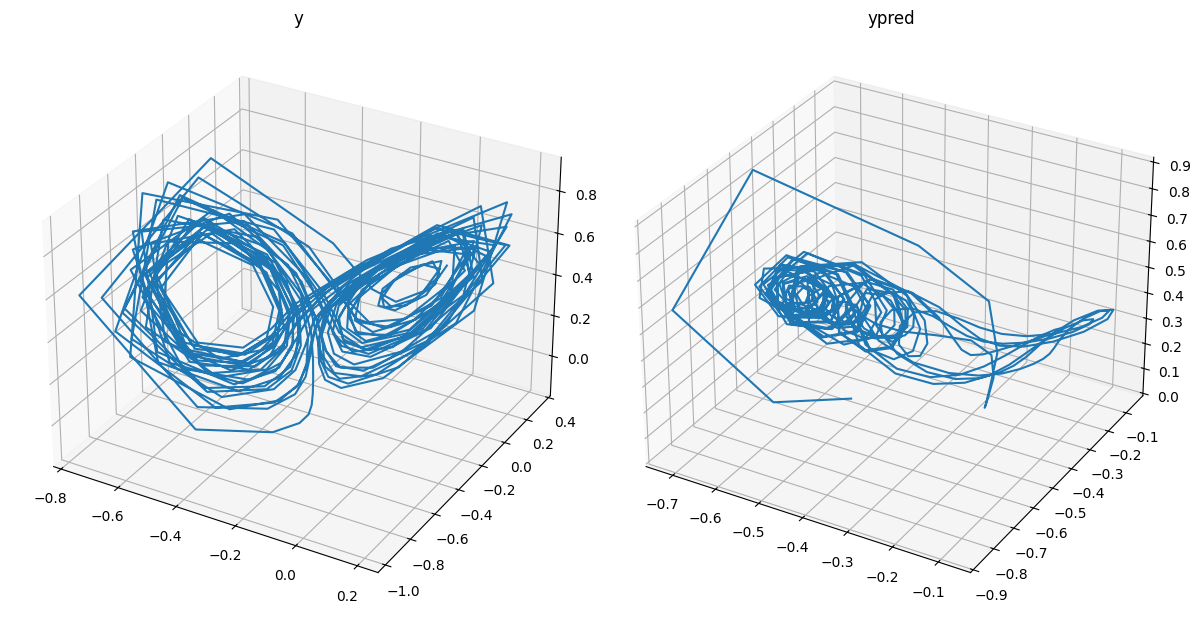

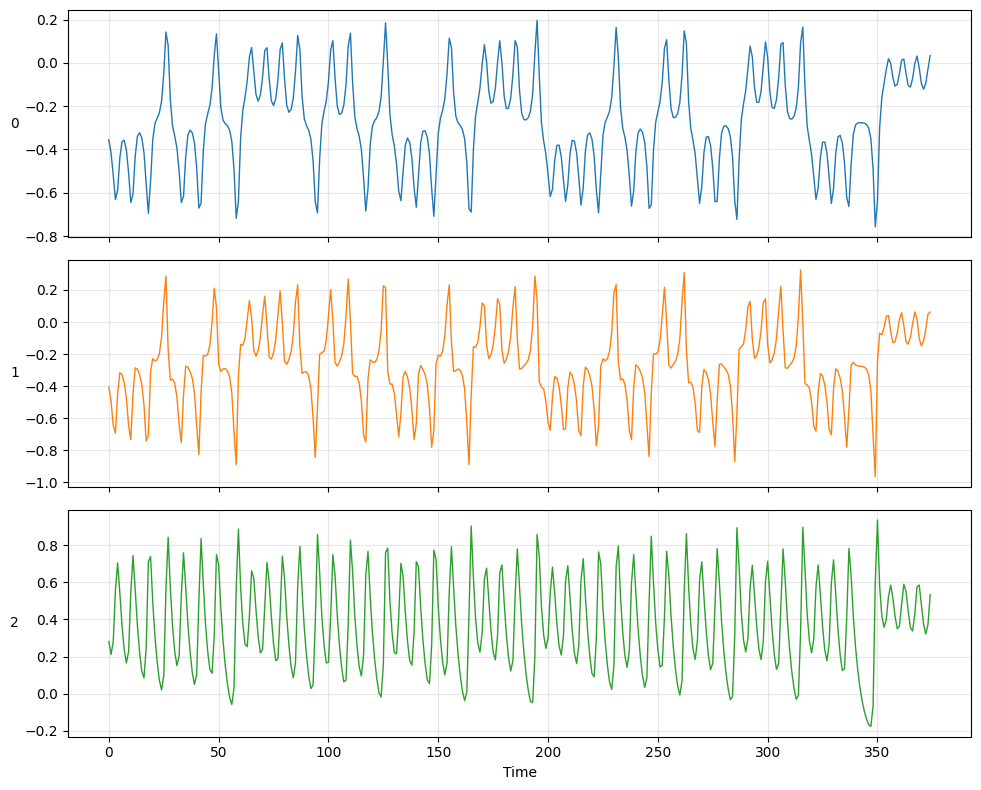

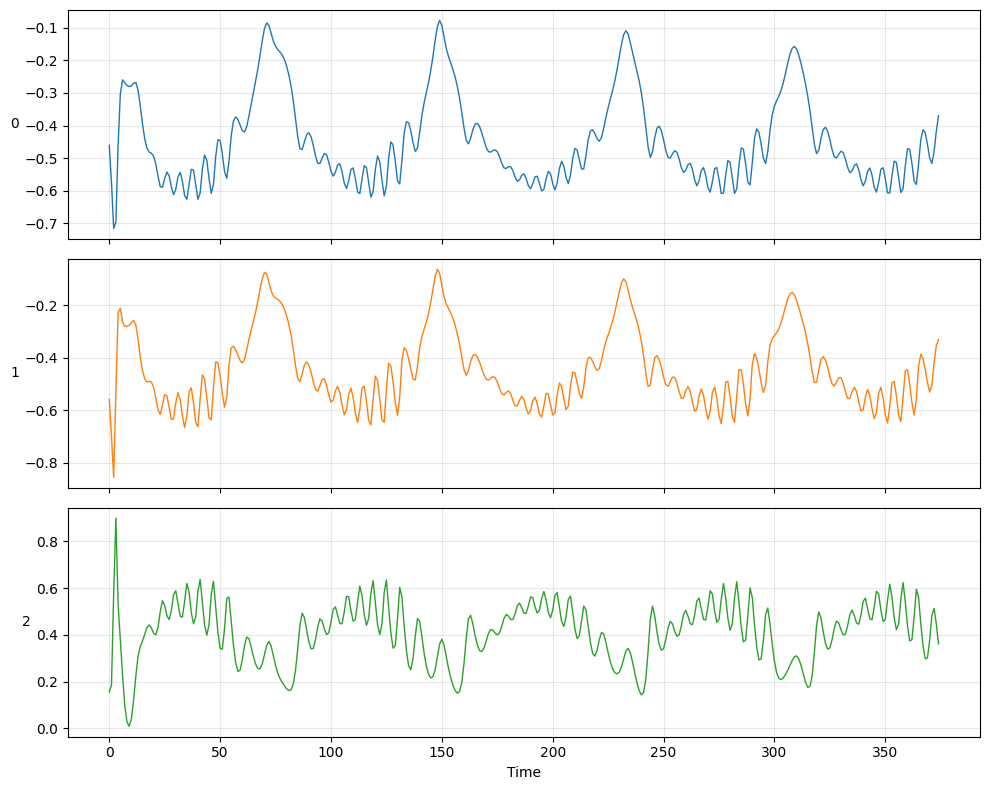

In [54]:
for_plot = test_targets[:500,:3], predictions[:500,:3]
viz.compare_plot(for_plot, titles=["y", "ypred"])
viz.plot_components(test_targets[:500], linewidth=1)
viz.plot_components(predictions[:500], linewidth=1)